In [3]:
import os
import sys
import numpy as np 
import tensorflow as tf
import keras
import itertools


In [6]:
# from keras.preprocessing.image import img_to_array, load_img
from keras.utils import img_to_array, array_to_img, load_img
from keras.applications.inception_resnet_v2 import  InceptionResNetV2, decode_predictions, preprocess_input
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

from time import strftime # gives hours and minutes of current time.

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [7]:
#The images are placed in a folder named Images.
FILE_1='Images/1163.jpg'
FILE_2='Images/1164.jpg'
FILE_3='Images/1165.jpg'
FILE_4='Images/1525.jpg'
FILE_5='Images/1526.jpg'
FILE_6='Images/1528.jpg'
FILE_7='Images/1529.jpg'
FILE_8='Images/1530.jpg'
FILE_9='Images/1531.jpg'
FILE_10='Images/1532.jpg'


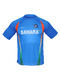

In [8]:
#Let's display one of the images here.
pic = load_img(FILE_1) #A method from Keras
display(pic)  #Display is a function in module IPython.core.display; displays a Python object in all frontends.

In [9]:
#Converting jpeg image to array
pic_arr = img_to_array(pic)  #a keras method
pic_arr
pic_arr.shape #Note that it is a 3D tensor

(80, 60, 3)

In [11]:
# Loading the model
%%time
inception_model = InceptionResNetV2(weights='imagenet')

UsageError: Line magic function `%%time` not found.


In [12]:
#Loading image in the desired resolution, as per the model requirements.
img_m2 = load_img(FILE_1, target_size=(299,299))

#Converting the loaded image into array
img_arr_m2 = img_to_array(img_m2)

#Adding a dimension as per the model requirements, the model requires a 4D tensor.
img_expanded_m2 = np.expand_dims(img_arr_m2, axis=0)
print('Shape before expansion:',img_arr_m2.shape)
print('Shape after expansion:',img_expanded_m2.shape)

#Preprocessing the image as per the model requirements.
preprocessed_img_m2 = preprocess_input(img_expanded_m2)

Shape before expansion: (299, 299, 3)
Shape after expansion: (1, 299, 299, 3)


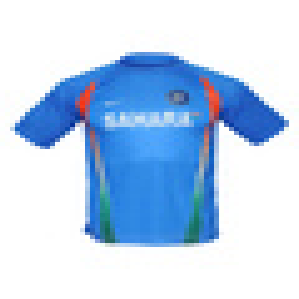

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.9077194),
  ('n04370456', 'sweatshirt', 0.003152334),
  ('n03710637', 'maillot', 0.0021984046),
  ('n02916936', 'bulletproof_vest', 0.0016118736),
  ('n03146219', 'cuirass', 0.0008314775)]]

In [13]:
display(img_m2)
prediction_m2 = inception_model.predict(preprocessed_img_m2)
decode_predictions(prediction_m2)

In [14]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = fashion_mnist.load_data() #org for original
# pip install -U jupyter_console

In [15]:
type(x_train_org)

numpy.ndarray